# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Rice Classification by using CNN</p>


In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. Models were created by using the Convolutional Neural Network (CNN) algorithm for the image dataset, and classification processes were performed. Statistical results of sensitivity, specificity, prediction, F1 score, accuracy, false positive rate and false negative rate were calculated using the confusion matrix values of the models and the results of each model were given in tables. Classification successes from the models were achieved as 99% for CNN.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. Importing Libraries](#1)
    
* [2. Preparing Data](#2)
    
* [3. Build Model](#3)
    
* [4. Evaluation](#4)   
    
* [5. END](#5)


# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Importing Libraries</p>

In [2]:
import numpy as np
import pandas as pd 

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import pathlib
import os

D:\anaconda\New folder\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2

  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Preparing Data</p>

In [3]:
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory('D:\BEM\learning\deep learning\excercise/Rice_Image_Dataset',
                                                 validation_split = 0.2,
                                                        subset = 'training',
                                                        seed = 1,
                                                        shuffle = True,
                                                        batch_size = 32,
                                                       image_size=(256,256))
test_data = keras.utils.image_dataset_from_directory('D:\BEM\learning\deep learning\excercise/Rice_Image_Dataset',
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 1,
                                                       shuffle = True,
                                                       batch_size = 32,
                                                    image_size=(256,256))

Found 75000 files belonging to 5 classes.

Using 60000 files for training.

Found 75000 files belonging to 5 classes.

Using 15000 files for validation.


In [5]:
filenames = pathlib.Path('D:\BEM\learning\deep learning\excercise/Rice_Image_Dataset')
for label in train_data.class_names :
    images = list(filenames.glob(f'{label}/*'))
    print(f'{label} : {len(images)}')

Arborio : 15000

Basmati : 15000

Ipsala : 15000

Jasmine : 15000

Karacadag : 15000


In [6]:
train_data.cardinality().numpy(),  test_data.cardinality().numpy() # The equation is: 60000/40 = cardinality, so it depends on your batch size.

(1875, 469)

In [7]:
train_set = train_data.take(1500)
val_set = train_data.skip(1500)   #train dataset now has first 1200 elements and the rest goes for val_set

In [8]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(1500, 375)

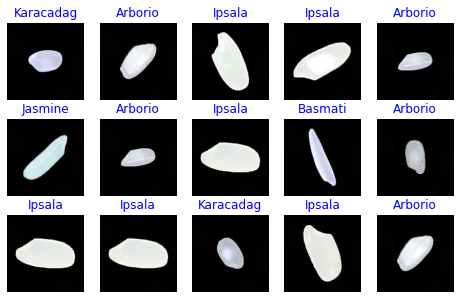

In [10]:
# print random images from the train set
plt.figure(figsize = (8, 5))
for images, labels in train_set.take(1):
    for i in range(15):
        index = random.randint(0, len(images))
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[index].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[index]], color= 'blue', fontsize= 12)
        plt.axis(False)
plt.show()

# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Build Model</p>

> ##  Model with 5 epochs


In [11]:
for images_batch, labels_batch in train_set:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)

(32,)


In [34]:
from tensorflow.keras import layers

In [35]:
tf.random.set_seed(42)

cnn_1 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'sigmoid')
])

cnn_1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_1 = cnn_1.fit(train_set, epochs = 5, validation_data = val_set)

Epoch 1/5

1500/1500 [==============================] - 4238s 3s/step - loss: 0.2200 - accuracy: 0.9576 - val_loss: 0.0861 - val_accuracy: 0.9718

Epoch 2/5

1500/1500 [==============================] - 4133s 3s/step - loss: 0.0448 - accuracy: 0.9844 - val_loss: 0.0537 - val_accuracy: 0.9835

Epoch 3/5

1500/1500 [==============================] - 4133s 3s/step - loss: 0.0316 - accuracy: 0.9890 - val_loss: 0.0633 - val_accuracy: 0.9806

Epoch 4/5

1500/1500 [==============================] - 4133s 3s/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0932 - val_accuracy: 0.9736

Epoch 5/5

1500/1500 [==============================] - 4170s 3s/step - loss: 0.0182 - accuracy: 0.9937 - val_loss: 0.0747 - val_accuracy: 0.9820


In [36]:
cnn_1.summary()

Model: "sequential_5"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         

                                                                 

 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       

                                                                 

 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         

 2D)                                                             

                                                                 

 flatten_5 (Flatten)         (None, 516128)            0         

                                                                 

 dense_10 (Dense)            (None, 500)               258064500 

                                                                 

 dense_11 (Dense)            (None, 5)                 2505      

                                      

# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Evaluation</p>

In [37]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2) 
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

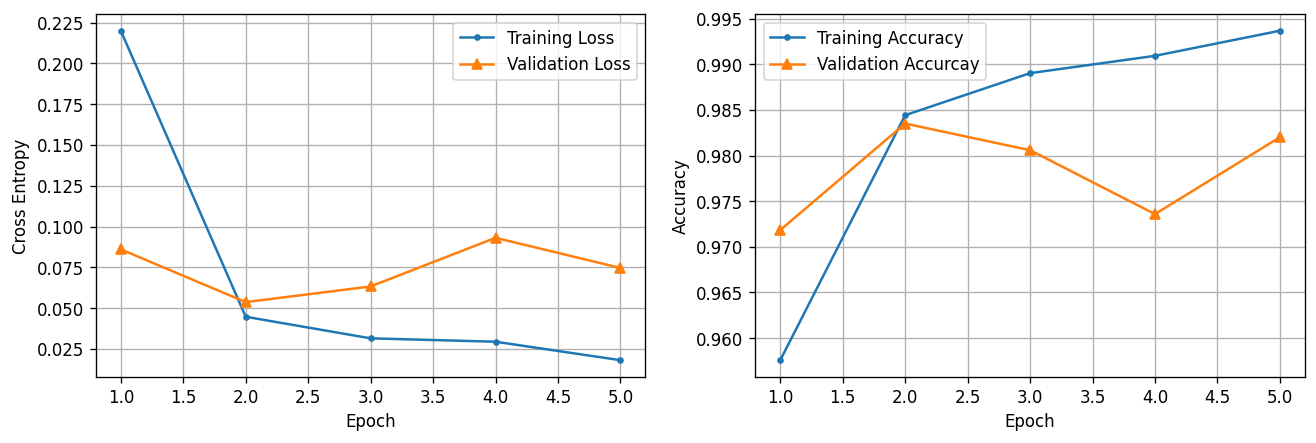

In [39]:
plot_training_curves(pd.DataFrame(history_1.history))

In [41]:
X_test, y_test = None, None
for images, labels in test_data.take(100):
    if X_test == None or y_test == None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis = 0)
        y_test = tf.concat([y_test, labels], axis = 0)
        
X_test.shape, y_test.shape

(TensorShape([3200, 256, 256, 3]), TensorShape([3200]))

In [44]:
from sklearn import metrics
y_pred_proba = cnn_1.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

100/100 [==============================] - 33s 328ms/step


In [45]:
metrics.accuracy_score(y_test, y_pred)

0.9834375

In [54]:
train_score = cnn_1.evaluate(train_data, verbose= 1)
test_score = cnn_1.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1875/1875 [==============================] - 727s 388ms/step - loss: 0.0207 - accuracy: 0.9942

469/469 [==============================] - 193s 411ms/step - loss: 0.0720 - accuracy: 0.9827

Train Loss:  0.020688496530056

Train Accuracy:  0.9942166805267334

*****************************

Test Loss:  0.07200954109430313

Test Accuracy:  0.9827333092689514


In [48]:
from sklearn.metrics import classification_report
target_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print(classification_report(y_test , y_pred, target_names=target_names))

              precision    recall  f1-score   support



     Arborio       0.98      0.97      0.97       603

     Basmati       0.97      0.99      0.98       611

      Ipsala       1.00      1.00      1.00       642

     Jasmine       0.99      0.97      0.98       656

   Karacadag       0.98      0.99      0.98       688



    accuracy                           0.98      3200

   macro avg       0.98      0.98      0.98      3200

weighted avg       0.98      0.98      0.98      3200




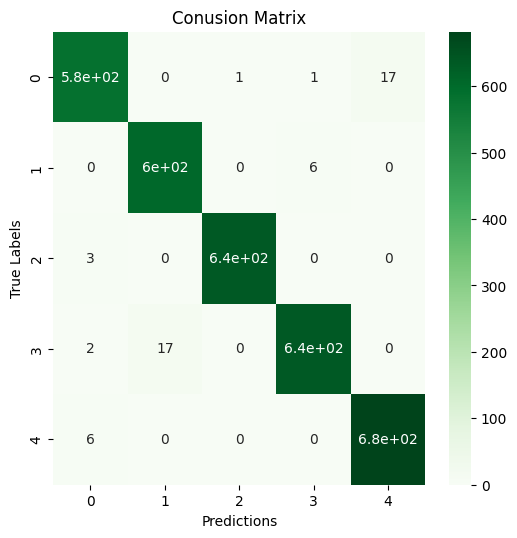

In [50]:
import seaborn as sns
plt.figure(figsize = (6,6), dpi = 100)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, cmap = 'Greens')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Conusion Matrix')
plt.show()

In [65]:
# plot random images from a given dataset, and compare predictions with ground truth
def plot_random_predictions(dataset, model):

    shuffled_data = dataset.shuffle(10)
    class_names = dataset.class_names

    for images, labels in shuffled_data.take(1):
        plt.figure(figsize = (8, 8), dpi = 120)
        y_pred_proba = model.predict(images)

    for i in range(9):
        index = random.randint(0, len(images))
        ax = plt.subplot(3,3, i + 1)

        img = images[index].numpy().astype("uint8")
        y_true = class_names[labels[index]]
        y_pred = class_names[np.argmax(y_pred_proba[index], axis = 0)]
      
        c = 'g' if y_pred == y_true else 'r'
      
        plt.imshow(img)
        plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c)
        plt.axis(False)

1/1 [==============================] - 0s 276ms/step


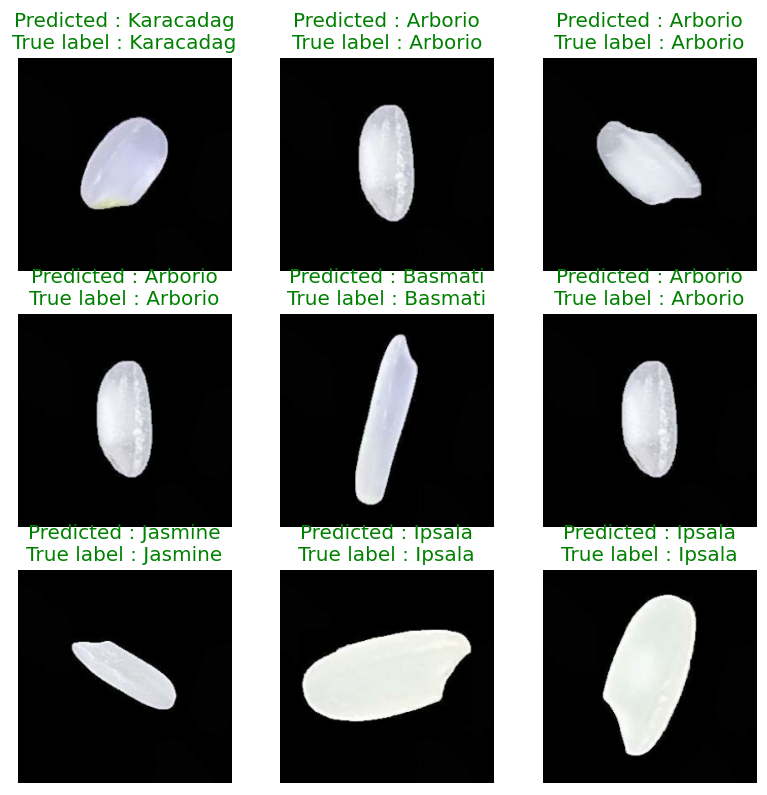

In [66]:
plot_random_predictions(test_data, cnn_1)

# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">End</p>